In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv('heart_2020_cleaned.csv')
heart

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

### `Correlation Charts`



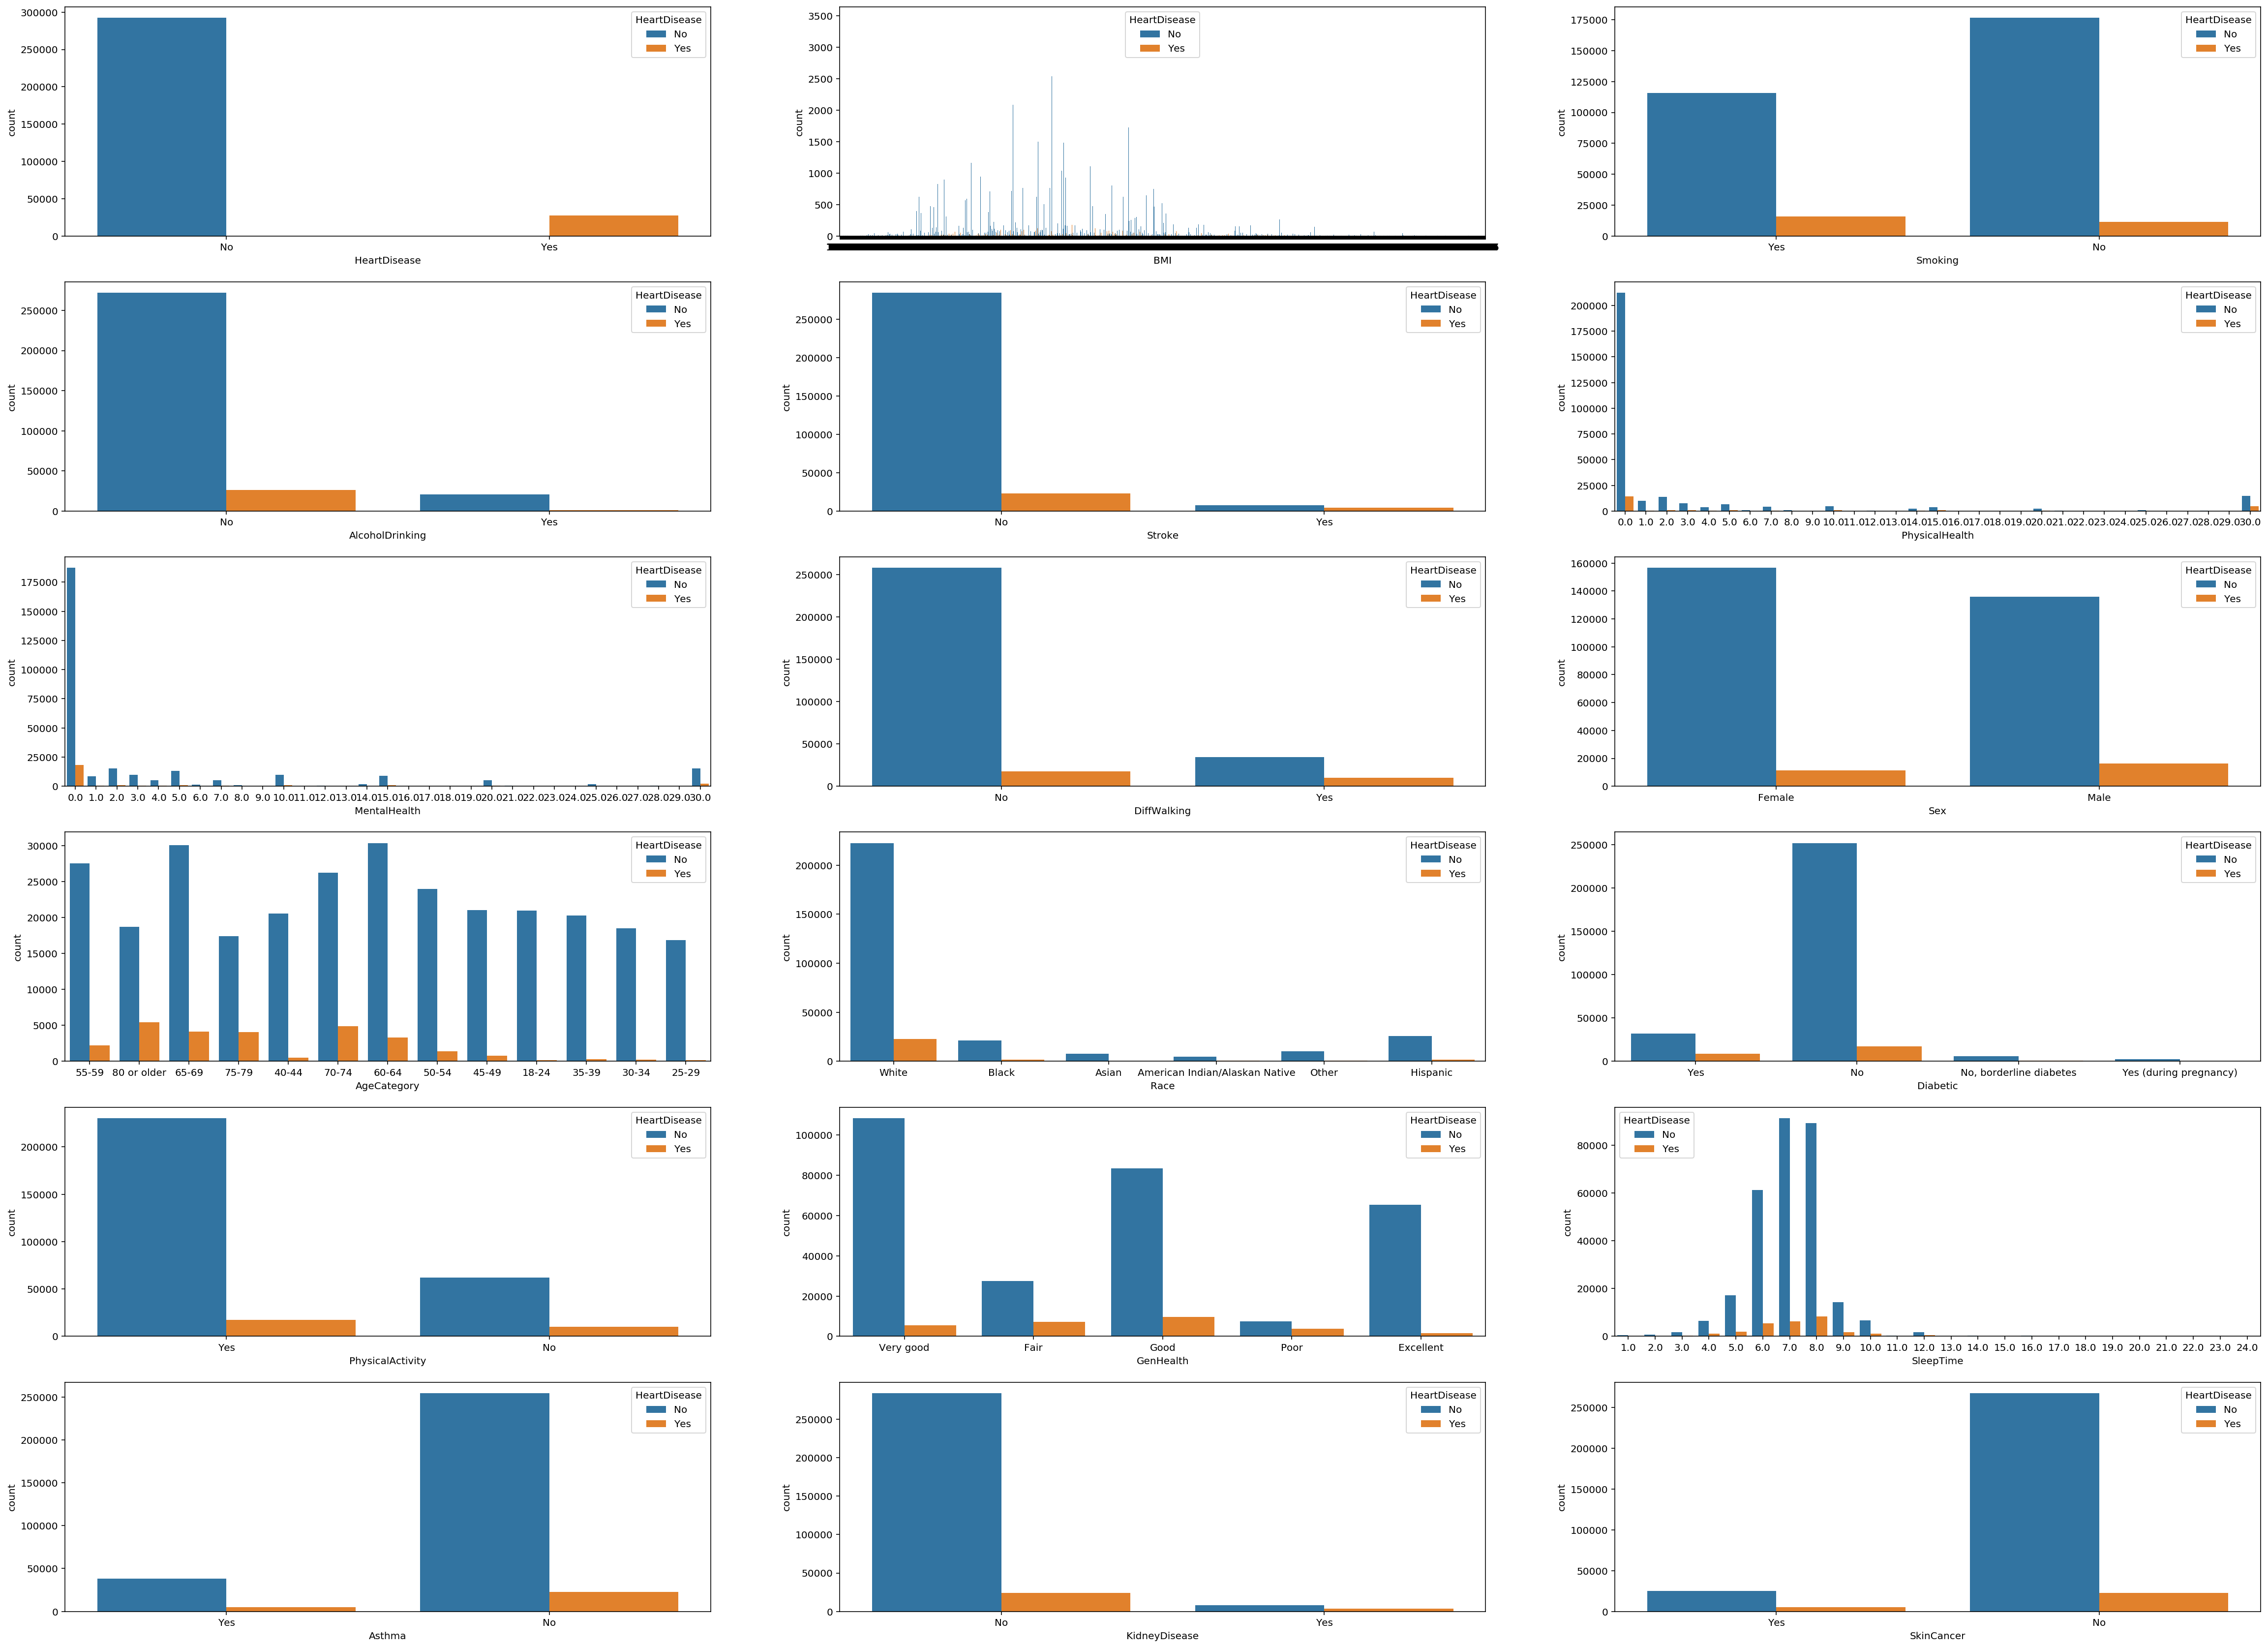

In [2]:
num = 1
plt.figure(figsize = (40,30))
for feature in heart:
    plt.subplot(6,3,num)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = heart)
    num +=1
# High correlation with : 'AgeCategory','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking','Sex','DiffWalking'
# Decided against: 'DiffWalking', 'PhysicalHealth' due to decrease in accuracy and f1 with them

In [3]:
fig = px.histogram(heart, x="Smoking",
             color='HeartDisease', barmode='group',
             height=300)
fig.write_html('smoking.html')
fig.show()

In [5]:
fig = px.histogram(heart, x="AgeCategory",
             color='HeartDisease', barmode='group',
             height=300)
fig.update_xaxes(categoryorder='array', categoryarray= ['18-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])
fig.write_html("/projects/cbafd6e1-e09c-4d13-88a6-c1a5de2f0182/website/assets/img/age_heart.html")
fig.show()

In [6]:
fig = px.histogram(heart, x="AlcoholDrinking",
             color='HeartDisease', barmode='group')
fig.write_html("/projects/cbafd6e1-e09c-4d13-88a6-c1a5de2f0182/website/assets/img/alcohol_heart.html")
fig.show()

### One\-Hot Encoding



In [7]:
pd.options.mode.chained_assignment = None  # default='warn'

new=heart[['AgeCategory','Stroke','Diabetic','KidneyDisease','GenHealth','Smoking','Sex']]

new.AgeCategory= new.AgeCategory.map({'18-24':'Young','25-29':'Young','30-34':'Young','35-39':'Middle aged','40-44':'Middle aged','45-49':'Middle aged','50-54':'Old','55-59':'Old', '60-64':'Old','65-69':'Very old','70-74':'Very old','75-79':'Very old','80 or older':'Very old'})

heart.HeartDisease = heart.HeartDisease.map(dict(Yes=1, No=0))

new=pd.get_dummies(new,columns=['Smoking','GenHealth', 'KidneyDisease','Diabetic','Stroke','AgeCategory','Sex'])

x_df=new
y_df=heart[['HeartDisease']]

x_df



Smoking_No  Smoking_Yes  GenHealth_Excellent  GenHealth_Fair  \
0                0            1                    0               0   
1                1            0                    0               0   
2                0            1                    0               1   
3                1            0                    0               0   
4                1            0                    0               0   
...            ...          ...                  ...             ...   
319790           0            1                    0               1   
319791           0            1                    0               0   
319792           1            0                    0               0   
319793           1            0                    0               0   
319794           1            0                    0               0   

        GenHealth_Good  GenHealth_Poor  GenHealth_Very good  KidneyDisease_No  \
0                    0               0                    1                 1   
1                    0               0                    1                 1   
2                    0               0                    0                 1   
3                    1               0                    0                 1   
4                    0               0                    1                 1   
...                ...             ...                  ...               ...   
319790               0               0                    0                 1   
319791               0               0                    1                 1   
319792               1               0                    0                 1   
319793               1               0                    0                 1   
319794               1               0                    0                 1   

        KidneyDisease_Yes  Diabetic_No  ...  Diabetic_Yes  \
0                       0            0  ...             1   
1                       0            1  ...             0   
2                       0            0  ...             1   
3                       0            1  ...             0   
4                       0            1  ...             0   
...                   ...          ...  ...           ...   
319790                  0            0  ...             1   
319791                  0            1  ...             0   
319792                  0            1  ...             0   
319793                  0            1  ...             0   
319794                  0            1  ...             0   

        Diabetic_Yes (during pregnancy)  Stroke_No  Stroke_Yes  \
0                                     0          1           0   
1                                     0          0           1   
2                                     0          1           0   
3                                     0          1           0   
4                                     0          1           0   
...                                 ...        ...         ...   
319790                                0          1           0   
319791                                0          1           0   
319792                                0          1           0   
319793                                0          1           0   
319794                                0          1           0   

        AgeCategory_Middle aged  AgeCategory_Old  AgeCategory_Very old  \
0                             0                1                     0   
1                             0                0                     1   
2                             0                0                     1   
3                             0                0                     1   
4                             1                0                     0   
...                         ...              ...                   ...   
319790                        0                1                     0   
319791                        1                0    

### Solving Data Imbalance



In [8]:
import random
def data_sample(x, y):
    length_hd = int(len(y.loc[y['HeartDisease']==1])*1.5)
    length_nhd = len(y.loc[y['HeartDisease']==0])

    sample_train_idx = random.sample(list(np.arange(length_nhd)), length_hd)

    subset_ytrain_no = y.loc[y['HeartDisease']==0].iloc[sample_train_idx]
    subset_ytrain_yes = y.loc[y['HeartDisease']==1]

    subset_xtrain_no = x.loc[y.loc[y['HeartDisease']==0].index].iloc[sample_train_idx]
    subset_xtrain_yes = x.loc[y.loc[y['HeartDisease']==1].index]

    subset_xtrain = pd.concat([subset_xtrain_no, subset_xtrain_yes], axis = 0).reset_index(drop = True)
    subset_ytrain = pd.concat([subset_ytrain_no, subset_ytrain_yes], axis = 0).reset_index(drop = True)

    idx = np.arange(len(subset_xtrain))
    np.random.shuffle(idx)

    xtrain = subset_xtrain.iloc[idx,:].reset_index(drop = True)
    ytrain = subset_ytrain.iloc[idx,:].reset_index(drop = True)

    return xtrain, ytrain

### Test/Train Split



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

x_train,y_train = data_sample(x_train, y_train)

### Optimizing Parameters



In [11]:
from sklearn.ensemble import RandomForestClassifier

estimators_para = [5,10,15,20,50,100,300,500]
arr = []
for parameter in estimators_para:
    
    print('Number of estimators: ', parameter)
    rff = RandomForestClassifier(n_estimators=parameter,random_state=42)
    
    lr=rff.fit(x_train,y_train['HeartDisease'])
    pred_label_rf = lr.predict(x_test)

    print('Accuracy: ', accuracy_score(y_test['HeartDisease'],pred_label_rf))
    
    arr.append(accuracy_score(y_test['HeartDisease'],pred_label_rf))
    print('\n')
    print('****************************************')

Number of estimators:  5
Accuracy:  0.7685861254866398


****************************************
Number of estimators:  10


Accuracy:  0.7678356447098923


****************************************
Number of estimators:  15


Accuracy:  0.7739176660047843


****************************************
Number of estimators:  20


Accuracy:  0.7743085414093404


****************************************
Number of estimators:  50


Accuracy:  0.7744336215387982


****************************************
Number of estimators:  100


Accuracy:  0.7742929063931581


****************************************
Number of estimators:  300


Accuracy:  0.7731359151956723


****************************************
Number of estimators:  500


Accuracy:  0.773057740114761


****************************************


In [12]:
px.line(x=estimators_para, y=arr)

In [14]:
from sklearn.linear_model import RidgeClassifier
estimators_para = [0.1,0.5,1,5,10]
arr = []
for parameter in estimators_para:
    
    print('Number of alpha: ', parameter)
    
    lr=RidgeClassifier(alpha=parameter).fit(x_train, y_train['HeartDisease'])
    pred_label_rf = lr.predict(x_test)

    print('Accuracy: ', accuracy_score(y_test['HeartDisease'],pred_label_rf))
    
    arr.append(accuracy_score(y_test['HeartDisease'],pred_label_rf))
    print('\n')
    print('****************************************')

Number of alpha:  0.1
Accuracy:  0.8196188183054769


****************************************
Number of alpha:  0.5
Accuracy:  0.8196188183054769


****************************************
Number of alpha:  1


Accuracy:  0.8196188183054769


****************************************
Number of alpha:  5
Accuracy:  0.8196188183054769


****************************************
Number of alpha:  10
Accuracy:  0.8196188183054769


****************************************


In [15]:
px.line(x=estimators_para, y=arr)

### ML Model Testing \(RF, RidgeClassifier, MLP\)



In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rff = RandomForestClassifier(n_estimators=100,random_state=42)

lr=rff.fit(x_train,y_train['HeartDisease'])
pred_label_rf = lr.predict(x_test)

rf_a=accuracy_score(y_test['HeartDisease'],pred_label_rf)
rf_f=f1_score(y_test['HeartDisease'],pred_label_rf)
rf_p=precision_score(y_test['HeartDisease'],pred_label_rf)
rf_rs=recall_score(y_test['HeartDisease'],pred_label_rf)

print('Accuracy: ', rf_a)
print('f1:',rf_f)
print('Precision:',rf_p)
print('Recall:',rf_rs)

Accuracy:  0.7742929063931581
f1: 0.3545560225342037
Precision: 0.23637772743531657
Recall: 0.7090486409155937


In [24]:
#Ridge Classifier: Best overall model (Best accuracy, f1, precision, and recall, and fastest run time)
from sklearn.linear_model import RidgeClassifier


lr=RidgeClassifier(alpha=1).fit(x_train, y_train['HeartDisease'])
pred_label_rf = lr.predict(x_test)

rc_a=accuracy_score(y_test['HeartDisease'],pred_label_rf)
rc_f=f1_score(y_test['HeartDisease'],pred_label_rf)
rc_p=precision_score(y_test['HeartDisease'],pred_label_rf)
rc_rs=recall_score(y_test['HeartDisease'],pred_label_rf)

print('Accuracy: ', rc_a)
print('f1:',rc_f)
print('Precision:',rc_p)
print('Recall:',rc_rs)

Accuracy:  0.8196188183054769
f1: 0.3711092940855819
Precision: 0.26691758801850546
Recall: 0.6087267525035766


In [18]:
#MLP (Multi-layer Perceptron classifier)
from sklearn.neural_network import MLPClassifier

lr = MLPClassifier(random_state=42, max_iter=300).fit(x_train, y_train['HeartDisease'])


pred_label_rf = lr.predict(x_test)

mlp_a=accuracy_score(y_test['HeartDisease'],pred_label_rf)
mlp_f=f1_score(y_test['HeartDisease'],pred_label_rf)
mlp_p=precision_score(y_test['HeartDisease'],pred_label_rf)
mlp_rs=recall_score(y_test['HeartDisease'],pred_label_rf)

print('Accuracy: ', mlp_a)
print('f1:',mlp_f)
print('Precision:',mlp_p)
print('Recall:',mlp_rs)

Accuracy:  0.7700870870401351
f1: 0.353427428219672
Precision: 0.23433035974578742
Recall: 0.7187052932761088


In [19]:
scores={'Accuracy':[rf_a,rc_a,mlp_a,0.783939241434254159,0.82187794581,0.7793213350029952],
'f1 Score':[rf_p,rc_p,mlp_p,0.481939473776621,0.7426065011487163,0.5214572905035219],
'Precision':[rf_p,rc_p,mlp_p,0.6454722195944013,0.75432477241942,0.4052124383558311],
'Recall Score':[rf_rs,rc_rs,mlp_rs,0.7233996213776013,0.821959916390016,0.6143295739496336],
'Model': ['Random Forest','Ridge Classifier','MLP ','Naive Bayes','Gradient Boost','Bagging']}

scores=pd.DataFrame.from_dict(scores)
scores=scores.set_index('Model')

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Accuracy", "f1 Score", "Precision", "Recall Score"))

fig.add_trace(go.Bar(name='Accuracy',x=list(scores.index.values),y=scores['Accuracy']),
              row=1, col=1)

fig.add_trace(go.Bar(name='f1 Score',x=list(scores.index.values),y=scores['f1 Score']),
              row=1, col=2)

fig.add_trace(go.Bar(name='Precision',x=list(scores.index.values),y=scores['Precision']),
              row=2, col=1)

fig.add_trace(go.Bar(name='Recall Score',x=list(scores.index.values),y=scores['Recall Score']),
              row=2, col=2)

fig.update_layout(height=600, width=1300,
                  title_text="ML Model Comparison")

fig.show()
fig.write_html("/projects/cbafd6e1-e09c-4d13-88a6-c1a5de2f0182/website/assets/img/scores.html")

### Confusion Matrix & ROC Curve



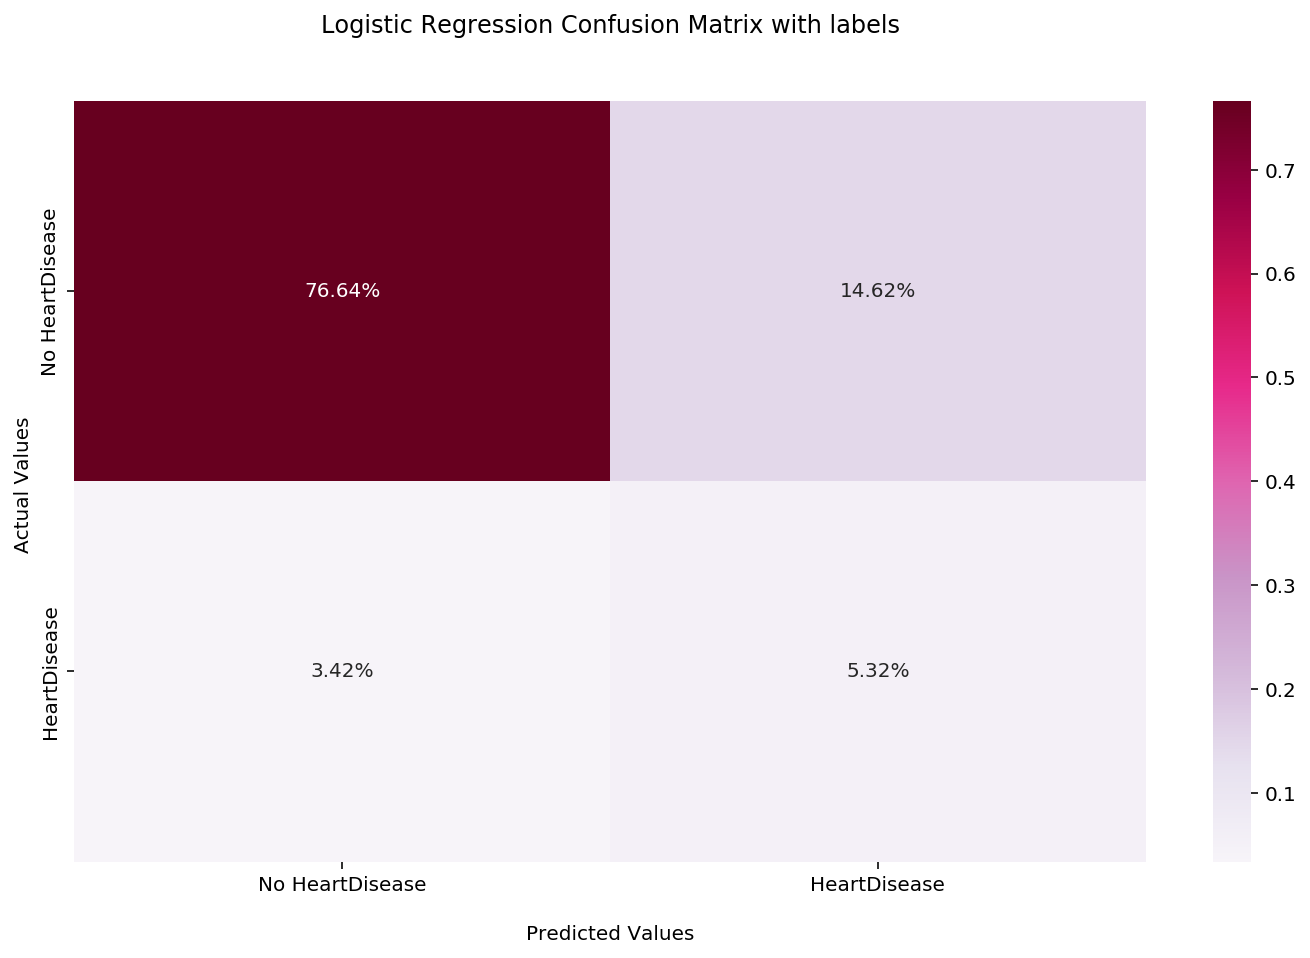

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

cm  = confusion_matrix(y_test, pred_label_rf)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

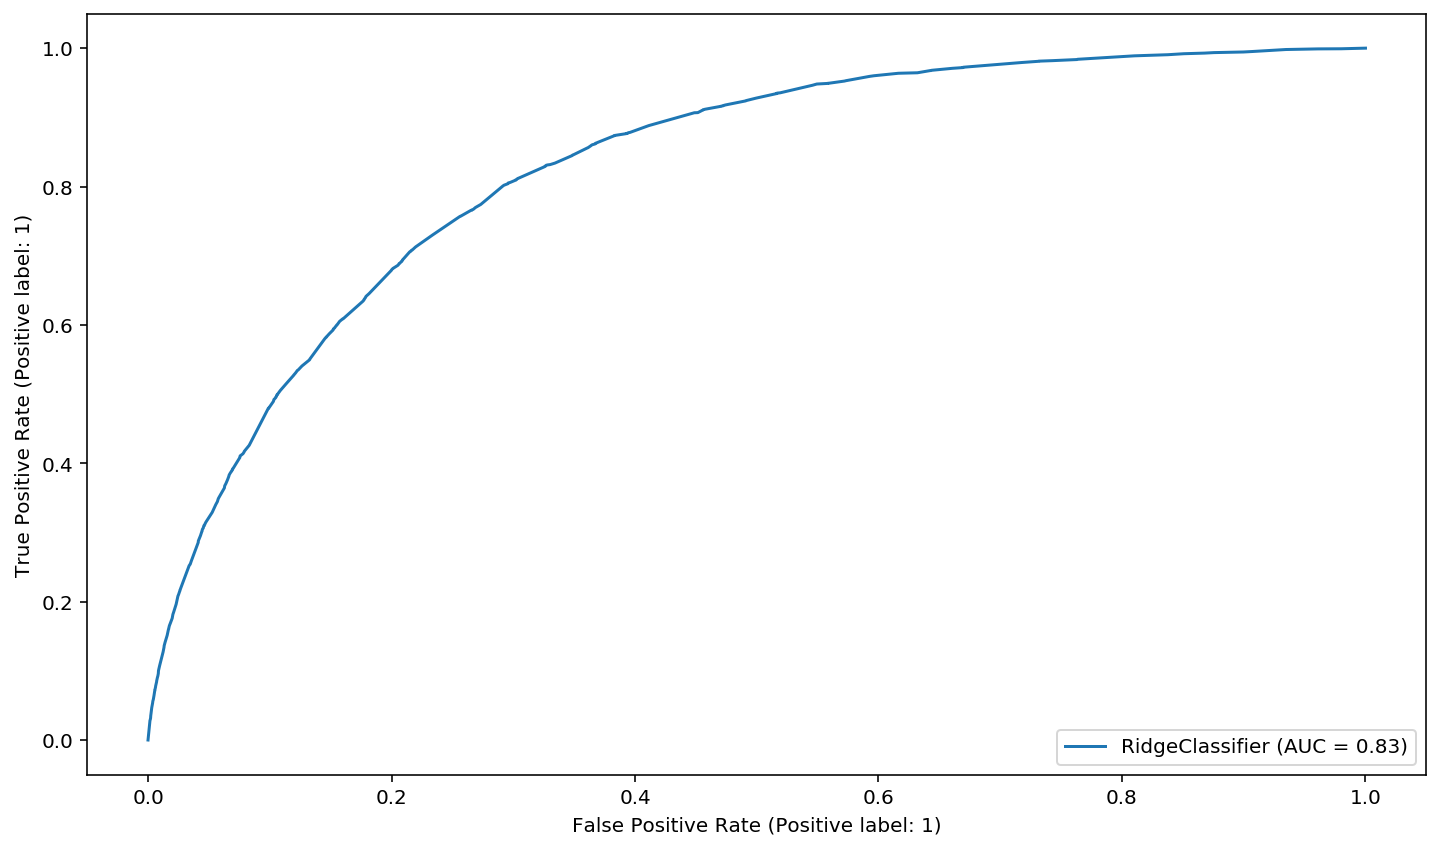

In [25]:
ax=plt.gca()
rdf_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test,ax=ax)
plt.show()

### Other Tested ML Models that we don't want



In [0]:
# #Logistic Classifer (Same as RidgeClassifier but not as good)
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(penalty='none').fit(x_train, y_train['HeartDisease'])
# pred_label_rf = lr.predict(x_test)
# print('Accuracy: ', accuracy_score(y_test['HeartDisease'],pred_label_rf))
# print('f1:',f1_score(y_test['HeartDisease'],pred_label_rf))
# print('Precision:',precision_score(y_test['HeartDisease'],pred_label_rf))
# print('Recall:',recall_score(y_test['HeartDisease'],pred_label_rf))

In [0]:
# #SVC (Support Vector Classifier) (Takes way too long)
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# lr= make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train['HeartDisease'])
# pred_label_rf = lr.predict(x_test)
# print('Accuracy: ', accuracy_score(y_test['HeartDisease'],pred_label_rf))
# print('f1:',f1_score(y_test['HeartDisease'],pred_label_rf))
# print('Precision:',precision_score(y_test['HeartDisease'],pred_label_rf))
# print('Recall:',recall_score(y_test['HeartDisease'],pred_label_rf))